### This model uses K-Means clustering to group similar data points into clusters. It applies Principal Component Analysis (PCA) to reduce the data's dimensionality, making it easier to visualize and interpret. The number of clusters (K) is determined using techniques like the Elbow Method. The cluster centers represent each group's characteristics. Overall, it helps explore patterns and find natural groupings in unlabeled data.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

## Read The Data & Take a Quik Look

In [113]:
url="https://raw.githubusercontent.com/jarif87/DataSets/main/mall_customer.csv"
df=pd.read_csv(url)

In [114]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
df.shape

(200, 5)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [117]:
df.drop('CustomerID', axis = 1, inplace = True)
df.rename(columns = {'Age' : 'age', 'Annual Income (k$)' : 'annual_income',
                     'Spending Score (1-100)' : 'spending_score'}, inplace = True)

In [118]:
df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Exploratory Data Analysis

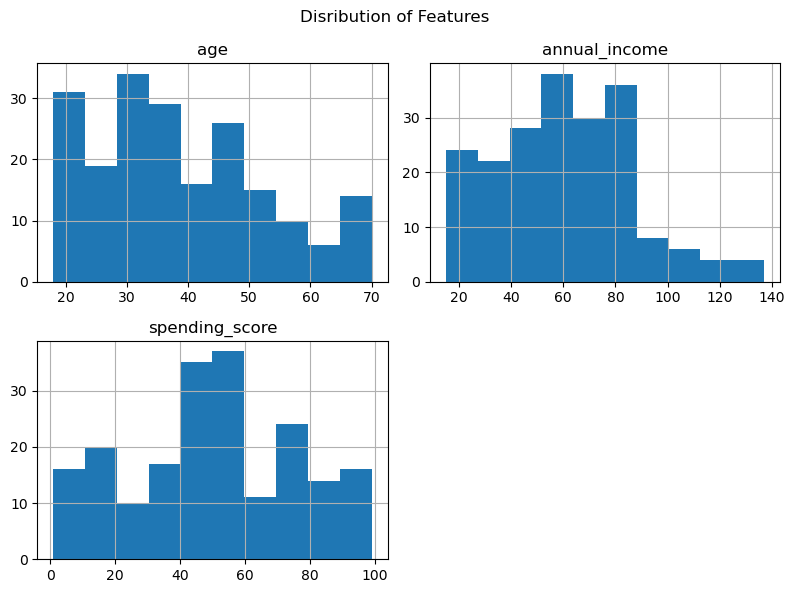

In [119]:
# Visualize the Distribution of the Data
df.hist(figsize = (8, 6))
plt.suptitle('Disribution of Features')
plt.tight_layout()
plt.show();

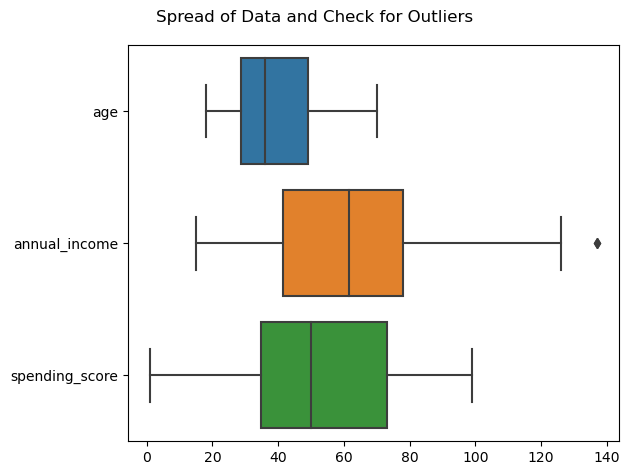

In [120]:
# Visualize the Spread of the Data
sns.boxplot(data =df, orient='h')
plt.suptitle('Spread of Data and Check for Outliers')
plt.tight_layout()
plt.show();

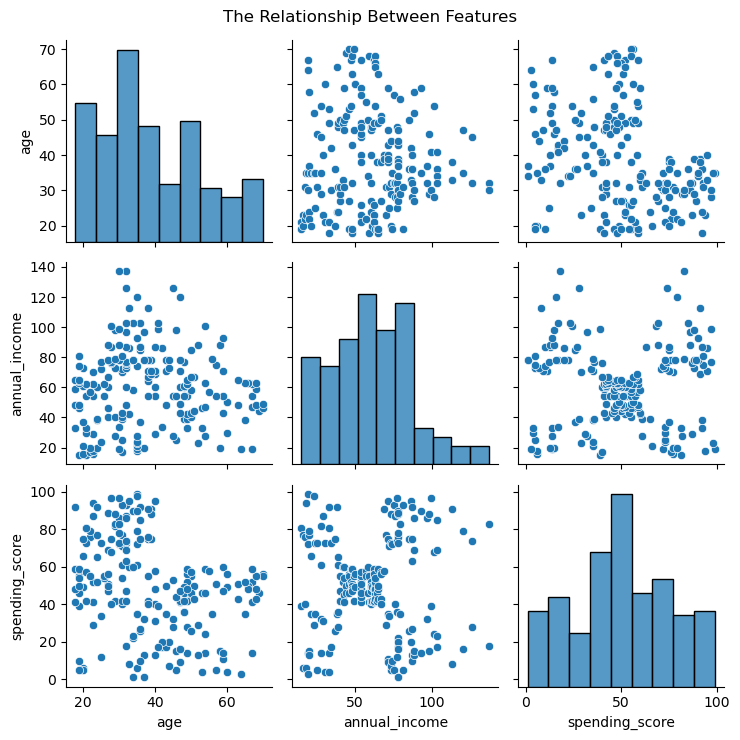

In [121]:
# Visualize the Relationship between the Data
sns.pairplot(df)
plt.suptitle('The Relationship Between Features')
plt.tight_layout()
plt.show()

# Prepare the Data for ML Model

In [122]:
# Check for Nulls
df.isnull().sum()

Gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [123]:
# Check for Duplictes
df.duplicated().sum()

0

In [124]:
categorical_features = df['Gender']
numerical_features = df.drop('Gender', axis = 1)

In [125]:
# Preprocess the numerical features by scaling them
scalar = StandardScaler()
numerical_features_scaled = scalar.fit_transform(numerical_features)

In [126]:
# Perform one-hot encoding on the categorical feature
encoder = OneHotEncoder()
categorical_features_encoded = encoder.fit_transform(categorical_features.values.reshape(-1, 1)).toarray()

In [127]:
# Combine the numerical features and the encoded categorical feature
processed_data = np.hstack((numerical_features_scaled, categorical_features_encoded))

# Find Opimal Number of Clusters

In [128]:
# Implement the Elbow Method
K_range = range(1, 15)
inertia_values = []
for k in K_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(processed_data)
    inertia_values.append(kmeans.inertia_)

/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mostafa/an

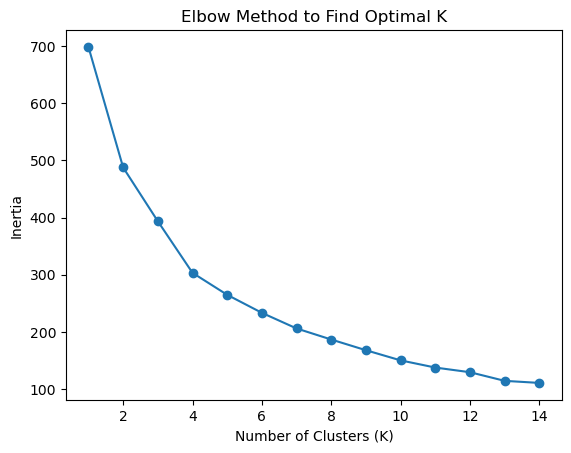

In [129]:
# Plot the Elbow Method graph
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()

# Train the K-Means Model

In [130]:
# Perform PCA
pca = PCA(n_components=4)
reduced_data_pca = pca.fit_transform(processed_data)

In [131]:
# Train the K-Means Model on Reduced Data
k_means_model_pca = KMeans(n_clusters=4)
predict_pca = k_means_model_pca.fit_predict(reduced_data_pca)
df["New_Predict_PCA"] = predict_pca

/home/mostafa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [132]:
df.head()

,Gender,age,annual_income,spending_score,New_Predict_PCA
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


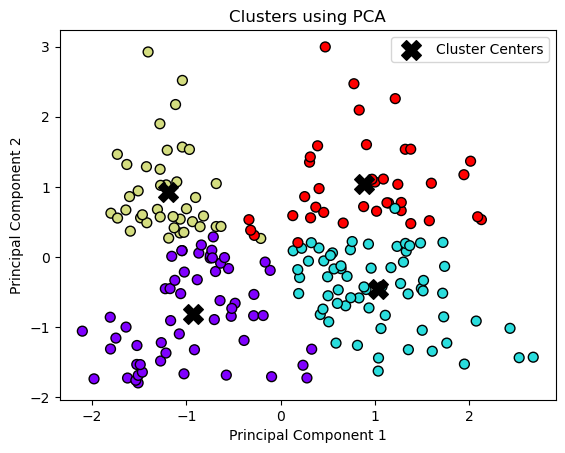

In [133]:
# Plot the clusters using PCA
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=predict_pca, cmap='rainbow', edgecolors='k', s=50)
plt.scatter(k_means_model_pca.cluster_centers_[:, 0], k_means_model_pca.cluster_centers_[:, 1], c='black', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters using PCA')
plt.legend()
plt.show()